# 1. Importing important library

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

import seaborn as sns
import plotly.graph_objects as go

In [2]:
url = "https://drive.google.com/file/d/1oYQSNxfvw6kFr6-N9rKLRAnLXlp0osEt/view?usp=drive_link"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
spotify5g_df = pd.read_csv(path)

2. Explorative data analysis

In [3]:
# cleaning the column
spotify5g_df.columns = spotify5g_df.columns.str.strip()
spotify5g_df.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [4]:
#to select the columns that contains only numeric data, this is to enable us explore the mean
selected_spotify5g_df =  spotify5g_df.set_index(['id', 'name']).drop(columns=['artist', 'html', 'type', 'Unnamed: 0'])
selected_spotify5g_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,name,,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,Se Eu Quiser Falar Com Deus,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
5QGM1U0eCYrQuwSJwTm5Zq,Saudade De Bahia,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
0NLIFSZxPzQhCwnkn5PJYs,"Canta Canta, Minha Gente",0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3mXqOdlLE1k67WsAxryPFs,Mulher Eu Sei,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
7bSzjzjTkWT2CkIPPdp0eA,Rosa Morena,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
1Gfqe7TAKklmuZf6hxsH6h,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
2XNwnFrdMDpismp0VUZ7cU,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [5]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_spotify5g_df = my_min_max.fit_transform(selected_spotify5g_df)
scaled_spotify5g_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,name,,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
5QGM1U0eCYrQuwSJwTm5Zq,Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
0NLIFSZxPzQhCwnkn5PJYs,"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
3mXqOdlLE1k67WsAxryPFs,Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
7bSzjzjTkWT2CkIPPdp0eA,Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
1Gfqe7TAKklmuZf6hxsH6h,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
2XNwnFrdMDpismp0VUZ7cU,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


In [6]:
# Decide on a random_state to use
seed = 108

# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_spotify5g_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

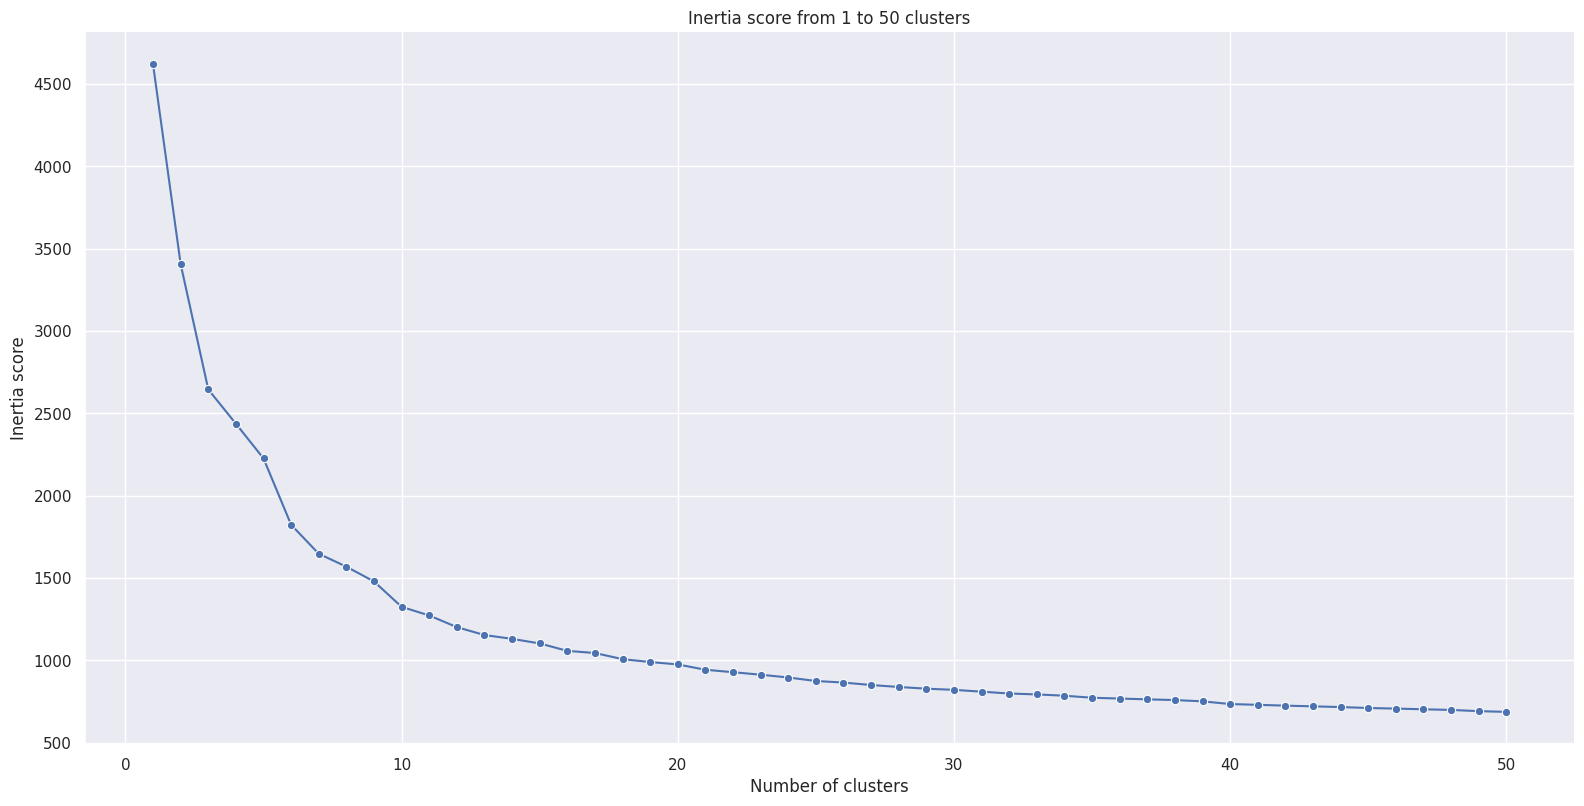

In [7]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [8]:
#using The silhouette score method
# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_spotify5g_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(scaled_spotify5g_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

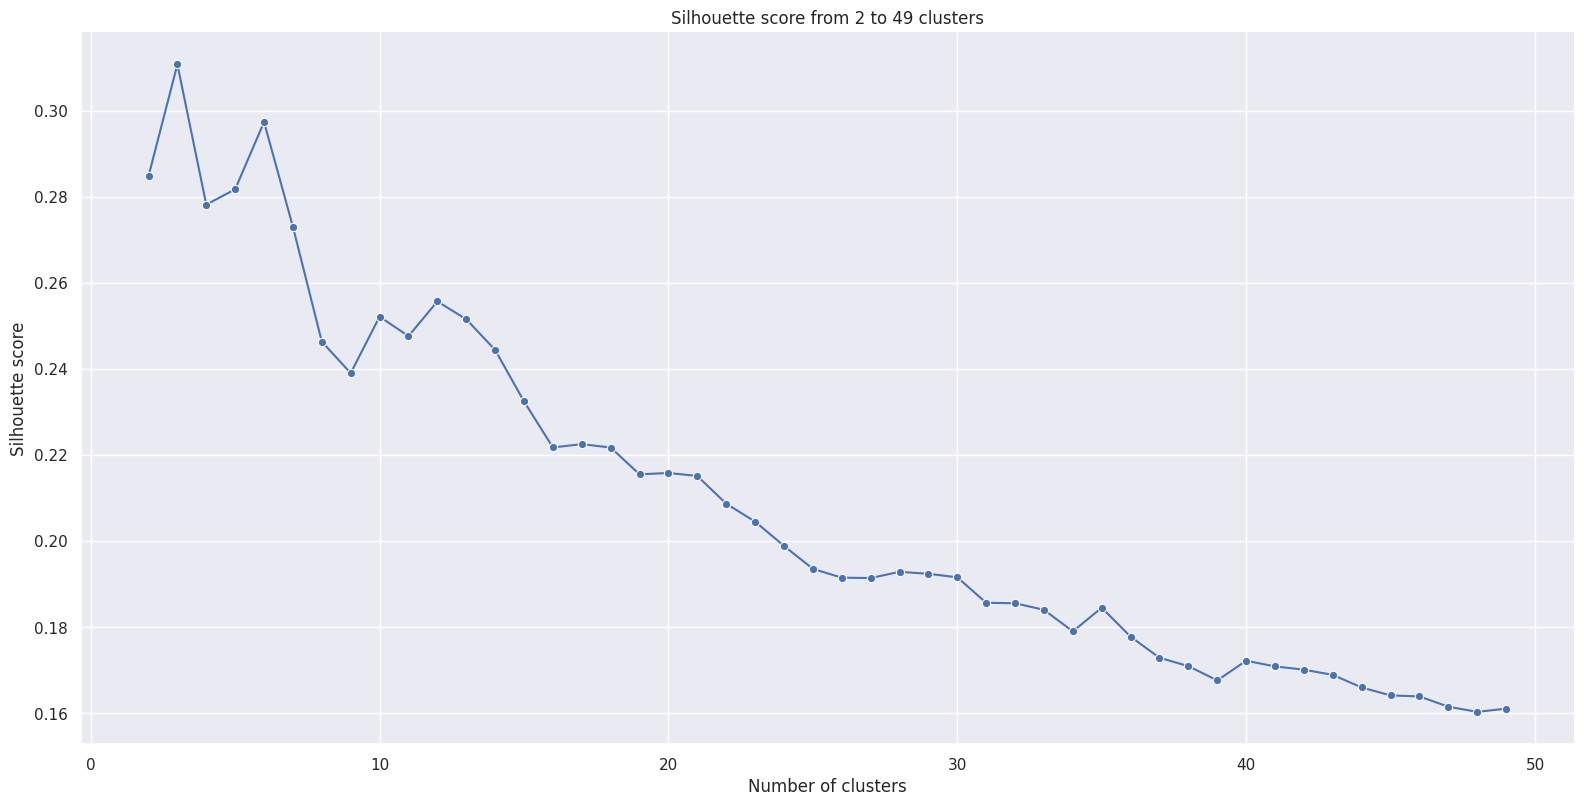

In [9]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [20]:
#using The silhouette score method
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_spotify5g_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(scaled_spotify5g_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

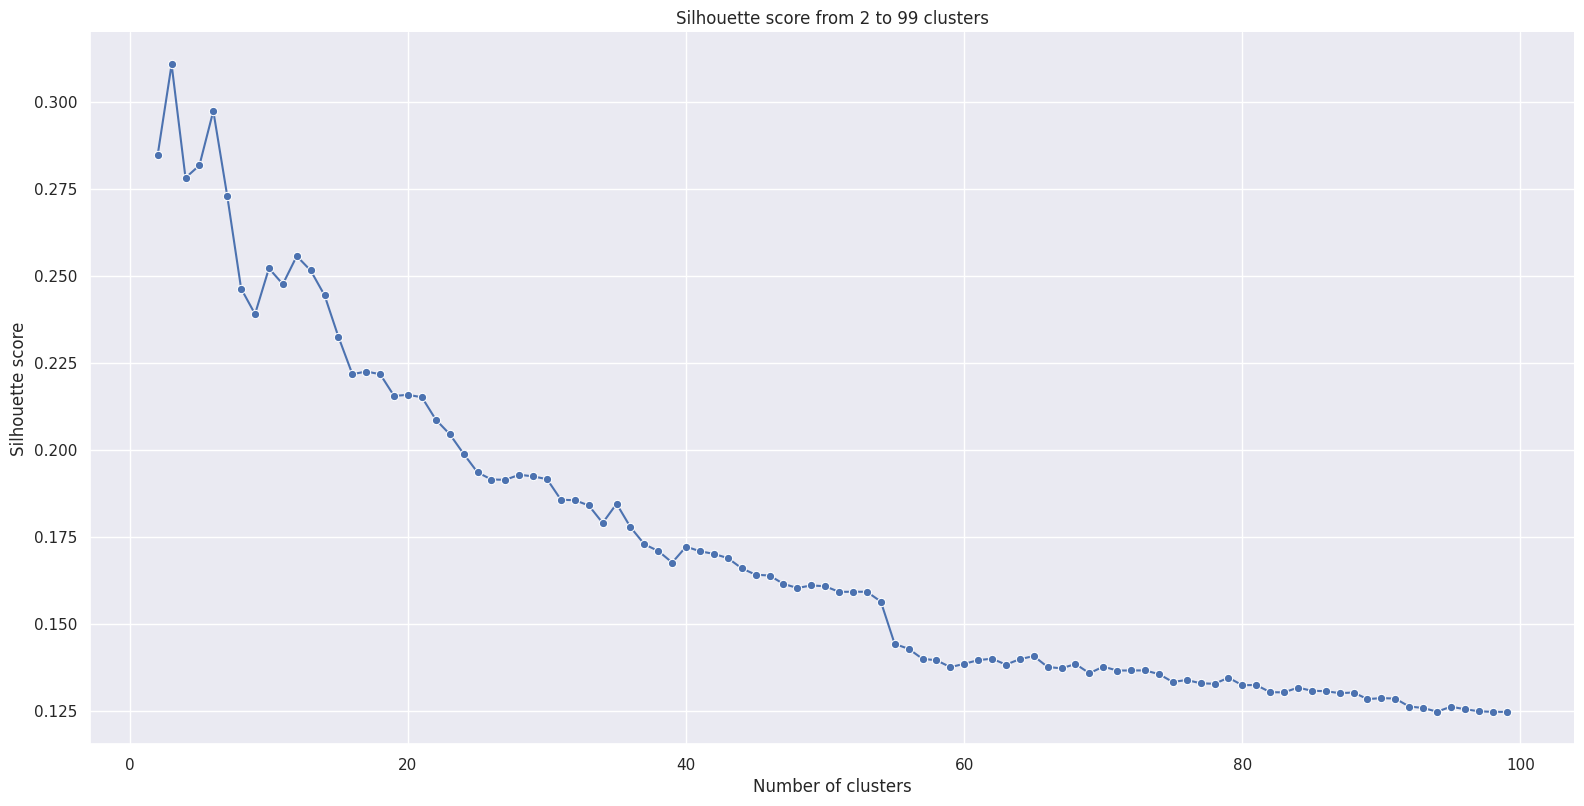

In [21]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [10]:
# SPECIAL FOR N_CLUSTER 40
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_spotify5g_df_40 = my_min_max.fit_transform(selected_spotify5g_df)

In [11]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 40, # you always choose the number of k here
                   random_state = 108)

# Fit the model to the data
my_kmeans.fit(scaled_spotify5g_df_40)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
scaled_spotify5g_df_40["cluster"] = clusters

In [12]:
# for 40 cluster
scaled_spotify5g_df_40.groupby(by="cluster")

In [13]:
scaled_spotify5g_df_40["cluster"].value_counts()

,count
cluster,
3,255
30,216
0,216
33,209
5,208
8,188
32,184
17,180
34,166


In [14]:
scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"]==3].sample(25)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
id,name,,,,,,,,,,,,,,
5Q3nmz4DdpdbT6FCBzX5a9,Phrenetic Tendencies,0.241986,0.908,0.545455,0.814401,1.0,0.067320,0.000269,0.635533,0.064134,0.218274,0.648731,0.079231,1.0,3
1m3Q1Kj5BKeCWB2a1ZdPt7,Valley Of The Dead,0.274043,0.856,0.727273,0.823726,1.0,0.077560,0.000327,0.961421,0.148936,0.408122,0.685219,0.059934,0.8,3
0Lgpj2BfgNp4EJfk39Mjx7,Warriors Trial,0.171665,0.950,0.454545,0.898340,1.0,0.088235,0.000012,0.852792,0.081662,0.109645,0.692359,0.071893,0.8,3
2gJHME7iMjwvueBoxC7jAE,Gasping for Air - Studio,0.142709,0.902,0.727273,0.852597,1.0,0.103268,0.000005,0.544162,0.091692,0.328934,0.387742,0.044074,0.8,3
7Ijz3BmXHhRz6SikHrotTU,Electric Funeral,0.281282,0.833,0.727273,0.807978,1.0,0.088562,0.000206,0.838579,0.115502,0.412183,0.559648,0.069873,0.8,3
1c7pujH1VB0ETfewb2uzvK,Intestinal Bleeding,0.337125,0.962,1.000000,0.878142,1.0,0.133987,0.000026,0.886294,0.378926,0.403046,0.441264,0.066768,0.8,3
0B5qSKbrv9c9lRbYQxfun9,Last One On Earth,0.204757,0.773,0.818182,0.814955,1.0,0.054031,0.000050,0.829442,0.265451,0.152284,0.802710,0.104971,0.8,3
6lAV4LlATkNy2K2gZYqSa3,Defenstration,0.294726,0.943,0.545455,0.723860,1.0,0.053595,0.000074,0.898477,0.312057,0.189848,0.476293,0.063452,0.8,3
2S2uvDk968xlBBIwOST7k2,The Lost Name of God,0.171665,0.771,0.727273,0.866258,1.0,0.059695,0.000350,0.836548,0.065451,0.164467,0.598491,0.079118,1.0,3


In [15]:
scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"]==16]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
id,name,,,,,,,,,,,,,,
3bdi228j2POsaAx8YMfi3Y,Let’s Explode,0.391934,0.492,0.000000,0.856656,1.0,0.028867,0.073394,0.595939,0.350557,0.225381,0.488434,0.057478,0.8,16
1jalG6lS08Gu8q16MgDbrC,Someone for You,0.234747,0.995,0.000000,0.895863,1.0,0.235294,0.002440,0.304569,0.255319,0.213198,0.792317,0.027908,0.8,16
1aIZ1YDVQK9nTTwxVnD8ah,Alright,0.389866,0.986,0.363636,0.996837,1.0,0.060566,0.121486,0.557360,0.193516,0.249746,0.467218,0.037533,0.8,16
6M340zMdDE9adjn5PWZS2o,Cinnamon,0.408480,0.704,0.454545,0.839800,1.0,0.044118,0.246988,0.397970,0.102330,0.350254,0.636474,0.047927,0.8,16
4oiwzl01mQDqRWFIa7VI3d,Animals - Radio Edit,0.613237,0.914,0.090909,0.890890,1.0,0.039542,0.001376,0.451777,0.072340,0.038680,0.598229,0.037895,0.8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4ec5OpTq3tMyOA33LNNDNj,Den Siste Kamp,0.319545,0.836,0.090909,0.889814,1.0,0.289760,0.011345,0.409137,0.117528,0.284264,0.396215,0.059014,0.8,16
6LjV77QbHwLyHiJ5hM9U0w,The Only One Astral Being,0.243020,0.941,0.181818,0.817401,1.0,0.084423,0.000100,0.460914,0.103343,0.042437,0.704332,0.074948,0.8,16
376qGSXzW3rNO8SQpVrGy3,Abominations of Ancient Gods,0.249224,0.912,0.181818,0.809429,1.0,0.098693,0.000019,0.675127,0.095643,0.100000,0.686457,0.076212,0.8,16


In [16]:
#scaled_spotify5g_df.groupby(by="cluster").mean() .... important to see the cluser table
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

# State the label for each arm of the chart
categories = scaled_spotify5g_df_40.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(scaled_spotify5g_df_40['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[0]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[1]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[2]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[3]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[4]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[5]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[6]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[7]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[8]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[9]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[10]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[11]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[12]].mean(),
                   scaled_spotify5g_df_40.loc[scaled_spotify5g_df_40["cluster"] == cluster, scaled_spotify5g_df_40.columns[13]].mean()]

                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean food preferences by cluster_40',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

In [17]:
# Create a RobustScaler object
scaler = RobustScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
robust_Selected_spotify5g_df = scaler.fit_transform(selected_spotify5g_df)
robust_Selected_spotify5g_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,name,,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,Se Eu Quiser Falar Com Deus,0.313984,-1.157005,1.000000,-0.955541,-1.0,0.246438,1.063138,-0.002833,5.882353,-0.230769,-0.232633,0.385983,0.0
5QGM1U0eCYrQuwSJwTm5Zq,Saudade De Bahia,0.535620,-0.818841,-0.500000,-0.874033,0.0,-0.355407,0.215967,-0.002921,-0.124567,0.573805,0.154816,-0.401326,0.0
0NLIFSZxPzQhCwnkn5PJYs,"Canta Canta, Minha Gente",0.823219,-0.019324,-0.500000,-0.610901,0.0,4.881811,0.635112,-0.002825,-0.006920,1.014553,-0.673325,-0.885854,0.0
3mXqOdlLE1k67WsAxryPFs,Mulher Eu Sei,0.437995,-1.661353,-0.166667,-1.774576,0.0,-0.145851,1.391706,-0.002861,1.806228,0.222453,-0.327071,-0.470335,0.0
7bSzjzjTkWT2CkIPPdp0eA,Rosa Morena,0.295515,-1.495169,0.166667,-2.053186,0.0,-0.298407,1.457419,-0.002390,-0.145329,-0.031185,0.046532,0.599701,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",-0.889182,-1.614976,-0.333333,-2.643175,0.0,-0.142498,1.459195,1.109053,-0.289273,-0.730769,-0.826371,9.425455,0.0
1Gfqe7TAKklmuZf6hxsH6h,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",-0.926121,-1.538647,0.166667,-2.393381,0.0,-0.194468,1.349081,0.659597,-0.384775,-0.793139,-0.952464,7.712477,0.0
2XNwnFrdMDpismp0VUZ7cU,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",-1.264908,-1.780362,0.666667,-5.865470,0.0,-0.207879,1.519581,1.504077,-0.330796,-0.795426,-1.257947,0.165425,-1.0


In [18]:
# Create a StandardScaler object
scaler = StandardScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
standard_selected_spotify5g_df = scaler.fit_transform(selected_spotify5g_df)
standard_selected_spotify5g_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,name,,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,Se Eu Quiser Falar Com Deus,0.681116,-1.368556,1.608851,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,0.061214,0.230889
5QGM1U0eCYrQuwSJwTm5Zq,Saudade De Bahia,1.066401,-0.882963,-0.911297,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,-0.413244,0.230889
0NLIFSZxPzQhCwnkn5PJYs,"Canta Canta, Minha Gente",1.566355,0.265117,-0.911297,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,-0.705236,0.230889
3mXqOdlLE1k67WsAxryPFs,Mulher Eu Sei,0.896692,-2.092782,-0.351264,-1.394432,0.739894,-0.506814,1.654602,-0.694174,1.343056,0.289535,-0.417262,-0.454831,0.230889
7bSzjzjTkWT2CkIPPdp0eA,Rosa Morena,0.649009,-1.854148,0.208769,-1.663249,0.739894,-0.634647,1.758549,-0.693358,-0.544551,-0.149790,0.077701,0.190008,0.230889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",-1.410434,-2.026187,-0.631281,-2.232499,0.739894,-0.504004,1.761359,1.234756,-0.683779,-1.361535,-1.078754,5.508689,0.230889
1Gfqe7TAKklmuZf6hxsH6h,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",-1.474648,-1.916582,0.208769,-1.991485,0.739894,-0.547552,1.587177,0.455047,-0.776151,-1.469566,-1.245808,4.476394,0.230889
2XNwnFrdMDpismp0VUZ7cU,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",-2.063584,-2.263676,1.048818,-5.341527,0.739894,-0.558790,1.856877,1.920037,-0.723941,-1.473527,-1.650523,-0.071702,-2.148453


In [19]:
#Number of samples
number_of_samples = selected_spotify5g_df.shape[0] # the rows in the dataframe, the number of row is the number of quantile

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles = number_of_samples).set_output(transform="pandas")

# Transform the foods_df DataFrame
quantile_selected_spotify5g_df = scaler.fit_transform(selected_spotify5g_df)
quantile_selected_spotify5g_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,name,,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,Se Eu Quiser Falar Com Deus,0.701662,0.145969,1.000000,0.187142,0.0,0.615399,0.791173,0.385460,0.999045,0.376576,0.409534,0.686091,0.538307
5QGM1U0eCYrQuwSJwTm5Zq,Saudade De Bahia,0.834066,0.206916,0.271207,0.203764,1.0,0.155808,0.610145,0.268055,0.369316,0.762323,0.593332,0.259171,0.538307
0NLIFSZxPzQhCwnkn5PJYs,"Canta Canta, Minha Gente",0.962457,0.490638,0.271207,0.260986,1.0,0.986626,0.717329,0.388804,0.491880,0.942205,0.196408,0.077379,0.538307
3mXqOdlLE1k67WsAxryPFs,Mulher Eu Sei,0.780378,0.037830,0.392147,0.096485,1.0,0.399217,0.864540,0.373710,0.919182,0.609954,0.371227,0.229270,0.538307
7bSzjzjTkWT2CkIPPdp0eA,Rosa Morena,0.689243,0.079862,0.544612,0.075468,1.0,0.230225,0.883359,0.443256,0.343523,0.486339,0.529996,0.758693,0.538307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.093810,0.050630,0.338556,0.044135,1.0,0.403324,0.883932,0.768628,0.181028,0.078047,0.136798,0.994841,0.538307
1Gfqe7TAKklmuZf6hxsH6h,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.076328,0.070883,0.544612,0.055025,1.0,0.350210,0.850783,0.710451,0.107088,0.014807,0.106229,0.992740,0.538307
2XNwnFrdMDpismp0VUZ7cU,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.000191,0.000764,0.805885,0.000573,1.0,0.336263,0.911253,0.998280,0.148357,0.010031,0.025411,0.590753,0.050153
